IMPORTING DATASET

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/Users/bukkysowunmi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("creditriskdataset.csv")

DESCRIPTIVE ANALYSIS + CLEANING

In [3]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
data.shape

(32581, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [3]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [3]:
data.dropna(subset=['person_emp_length', 'loan_int_rate'], inplace=True)

In [5]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [4]:
data.drop(columns=['loan_amnt', 'loan_status', 'loan_percent_income'], inplace=True)

In [5]:
#average life expectancy in uk is 81 in the UK
data = data[data['person_age']<81]
#average retirement age is 66 currently, filtering employment length
emp_max = 66 - 18
data = data[data['person_emp_length'] <= emp_max]

data.shape

(28631, 9)

In [6]:
data = data[~data['loan_intent'].isin(['EDUCATION', 'MEDICAL', 'VENTURE', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT'])]
data.shape

(4874, 9)

In [7]:
data.drop(columns=['loan_intent'], inplace=True)

In [8]:
data.drop(columns=['loan_grade'], inplace=True)
data = data[data['person_home_ownership'] != 'OTHER' ]
data.shape

(4858, 7)

ENCODING CATEGORICAL COLUMNS

In [9]:
categorical_columns = ['person_home_ownership','cb_person_default_on_file']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print(data_encoded.head())

    person_age  person_income  person_emp_length  loan_int_rate  \
8           24          83000                8.0           8.90   
21          25         137000                9.0          16.77   
23          24          10980                0.0           7.29   
24          22          80000                3.0          14.54   
27          23          11000                0.0           9.32   

    cb_person_cred_hist_length  person_home_ownership_OWN  \
8                            2                      False   
21                           2                      False   
23                           3                       True   
24                           4                      False   
27                           3                       True   

    person_home_ownership_RENT  cb_person_default_on_file_Y  
8                         True                        False  
21                        True                         True  
23                       False              

In [10]:
data = data.rename(columns= {"person_age": "Age", "person_income": "Income", "person_emp_length": "Employment Years", "cb_person_cred_hist_length": "Credit History Years",
                              "person_home_ownership": "Home Ownership", "cb_person_default_on_file": "Defaulted on Loan", "loan_int_rate": "Interest Rate"})

In [11]:
data.head(3)

,Age,Income,Home Ownership,Employment Years,Interest Rate,Defaulted on Loan,Credit History Years
8,24,83000,RENT,8.0,8.90,N,2
21,25,137000,RENT,9.0,16.77,Y,2
23,24,10980,OWN,0.0,7.29,N,3


EDA

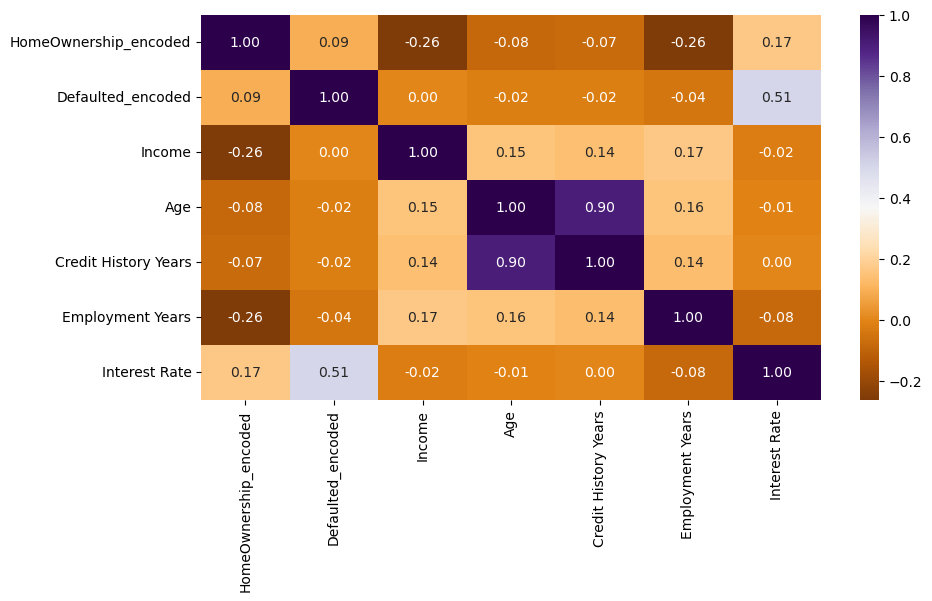

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['HomeOwnership_encoded'] = label_encoder.fit_transform(data['Home Ownership'])
data['Defaulted_encoded'] = label_encoder.fit_transform(data['Defaulted on Loan'])
plt.figure(figsize=(10,5))
columns_for_correlation = ['HomeOwnership_encoded','Defaulted_encoded', 'Income', 'Age', 'Credit History Years', 'Employment Years', 'Interest Rate']
correlation_data = data[columns_for_correlation]
c = correlation_data.corr()
sns.heatmap(c, cmap="PuOr", annot=True, fmt=".2f")
plt.show()

HOW DOES AGE CORRELATE WITH INTEREST RATE?

In [12]:
unique_age = data['Age'].unique() 
print(unique_age)

[24 25 22 23 26 21 20 34 29 35 33 27 30 28 31 32 42 36 41 45 38 50 39 44
 37 43 46 40 49 48 47 51 53 58 66 59 60 52 54 57 64 73 70 61 62 55 56 65
 63 69 67]


In [13]:
#defining bins
bins = [11, 31, 51, 71]
#relevant labels
labels = ['11-30', '31-50', '51-70']
#new column
data['Age Range'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

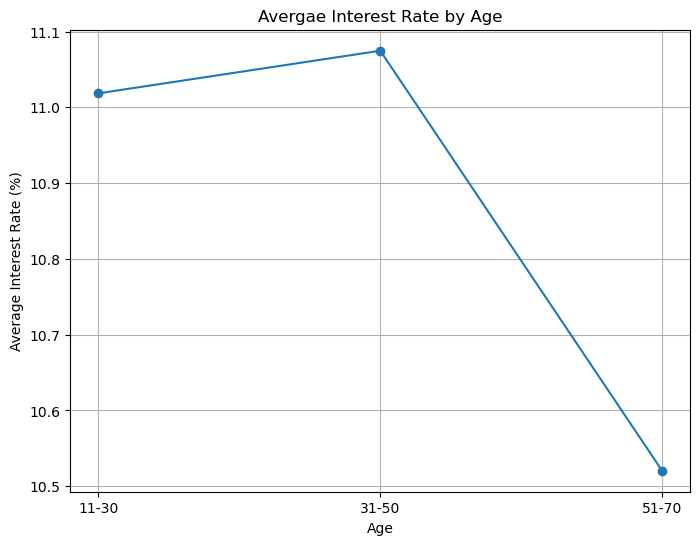

In [14]:
#calculating the avg interest rate
av_intrate = data.groupby('Age Range')['Interest Rate'].mean().reset_index()

#plotting the data
plt.figure(figsize=(8,6))
plt.plot(av_intrate['Age Range'], av_intrate['Interest Rate'], marker='o')
plt.title('Average Interest Rate by Age')
plt.xlabel('Age')
plt.ylabel('Average Interest Rate (%)')

plt.grid(True)

plt.show()

HOW DOES YEARS OF EMPLOYMENT CORRELATE WITH INTEREST RATE?

In [15]:
#defining bins
emplo_bins = [0, 10, 20, 30, 40]  
#relevant labels
emplo_labels = ['0-10', '10-20', '20-30', '30-40']
#new column
data['Employment Range'] = pd.cut(data['Employment Years'], bins=emplo_bins, labels=emplo_labels, right=False)

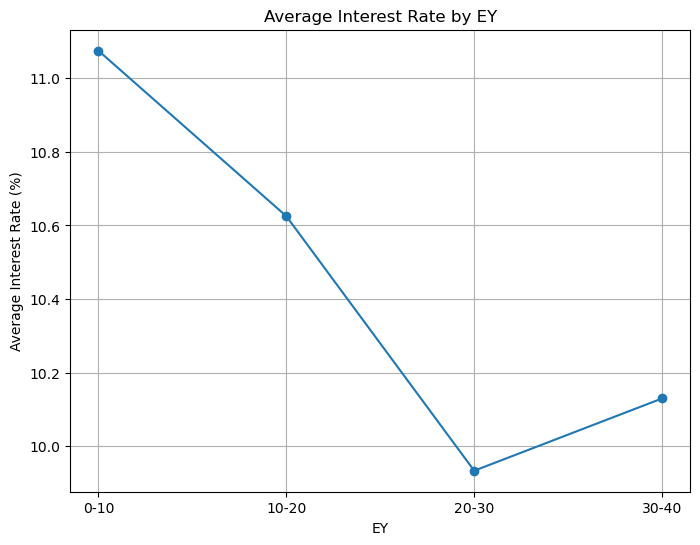

In [16]:
#calculating the avg interest rate
av_intrate = data.groupby('Employment Range')['Interest Rate'].mean().reset_index()

#plotting the data
plt.figure(figsize=(8,6))
plt.plot(av_intrate['Employment Range'], av_intrate['Interest Rate'], marker='o')
plt.title('Average Interest Rate by EY')
plt.xlabel('EY')
plt.ylabel('Average Interest Rate (%)')

plt.grid(True)

plt.show()

HOW DOES INCOME CORRELATE WITH INTEREST RATE?

In [17]:
#defining bins
income_bins = [4200, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 950000]  
#relevant labels
income_labels = ['4.2k-50k', '50k-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k', '900k-950k']
#new column
data['Income Range'] = pd.cut(data['Income'], bins=income_bins, labels=income_labels, right=False)

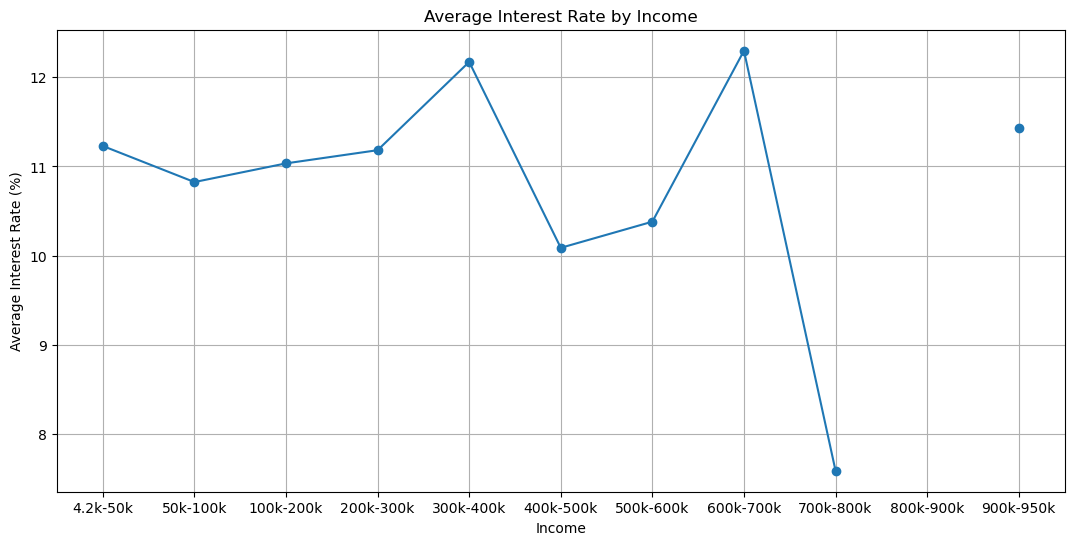

In [20]:
#calculating the avg interest rate
av_intrate = data.groupby('Income Range')['Interest Rate'].mean().reset_index()

#plotting the data
plt.figure(figsize=(13,6))
plt.plot(av_intrate['Income Range'], av_intrate['Interest Rate'], marker='o')
plt.title('Average Interest Rate by Income')
plt.xlabel('Income')
plt.ylabel('Average Interest Rate (%)')

plt.grid(True)

plt.show()

HOW DOES THE TYPE OF PROPERTY OWNERSHIP AFFECT YOUR INTEREST RATE?

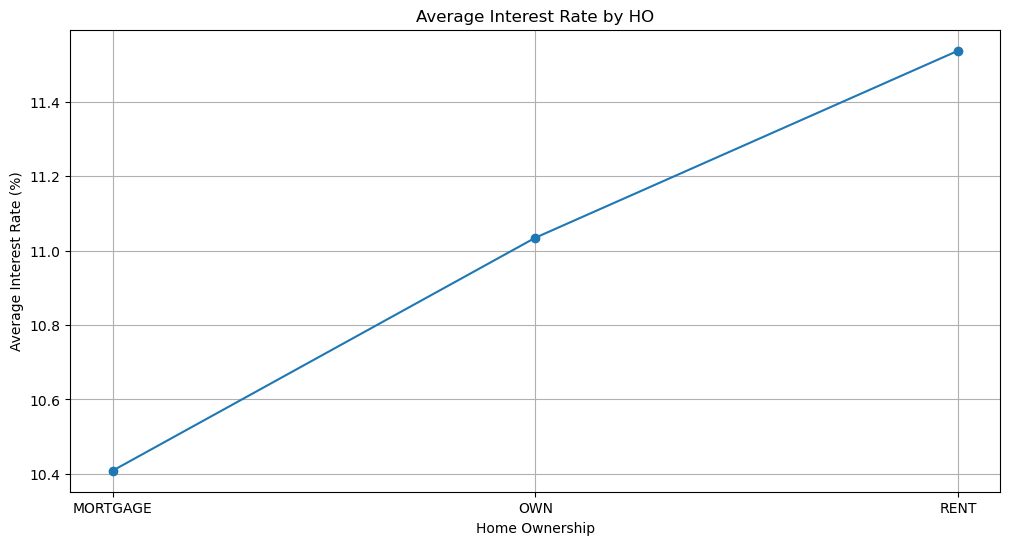

In [21]:
#calculating the avg interest rate
av_intrate = data.groupby('Home Ownership')['Interest Rate'].mean().reset_index()

#plotting the data
plt.figure(figsize=(12,6))
plt.plot(av_intrate['Home Ownership'], av_intrate['Interest Rate'], marker='o')
plt.title('Average Interest Rate by HO')
plt.xlabel('Home Ownership')
plt.ylabel('Average Interest Rate (%)')

plt.grid(True)

plt.show()

HOW DOES THE TYPE OF PROPERTY OWNERSHIP AFFECT YOUR INTEREST RATE?

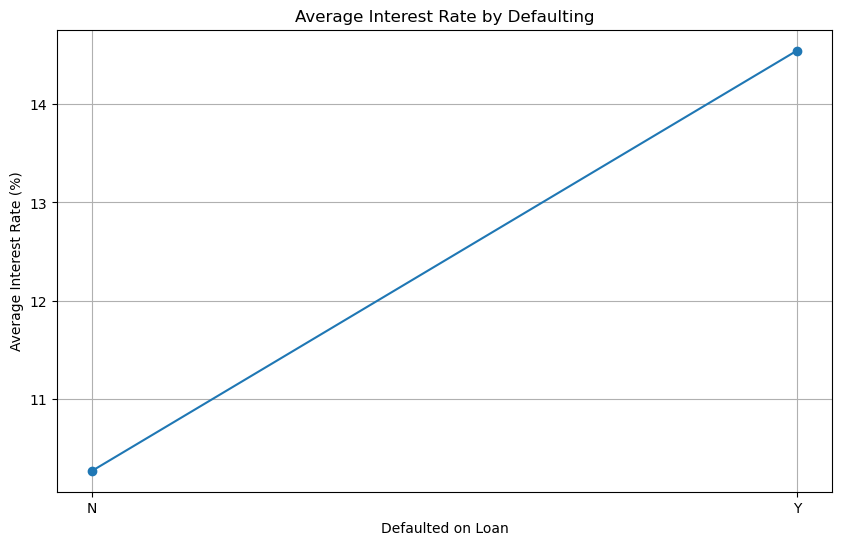

In [22]:
#calculating the avg interest rate
av_intrate = data.groupby('Defaulted on Loan')['Interest Rate'].mean().reset_index()

#plotting the data
plt.figure(figsize=(10,6))
plt.plot(av_intrate['Defaulted on Loan'], av_intrate['Interest Rate'], marker='o')
plt.title('Average Interest Rate by Defaulting')
plt.xlabel('Defaulted on Loan')
plt.ylabel('Average Interest Rate (%)')

plt.grid(True)

plt.show()

MODEL FITTING

In [12]:
numerical_columns = ['Age', 'Income', 'Employment Years', 'HomeOwnership_encoded', 'Defaulted_encoded']
X = data[numerical_columns]
y = data['Interest Rate']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LINEAR REGRESSION

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)

print("The accuracy of the model is {:.2f}%".format(score * 100))


The accuracy of the model is -0.02%


RANDOM FOREST CLASSIFIER

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


numerical_columns = ['Age', 'Income', 'Employment Years', 'HomeOwnership_encoded', 'Defaulted_encoded']
X = data[numerical_columns]
y = data['Interest Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(X, y)

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: -0.1452661026486779
Mean Squared Error: 1.9166642991955583
R-squared: 0.8146945059245738


IMRPOVED

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


numerical_columns = ['Age', 'Income', 'Employment Years', 'HomeOwnership_encoded', 'Defaulted_encoded']
X = data[numerical_columns]
y = data['Interest Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_regressor = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=2, min_samples_split=10, max_features='log2', random_state=0, oob_score=True)

best_regressor.fit(X_train, y_train)

oob_score = best_regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions_train = best_regressor.predict(X_train)

mse_train = mean_squared_error(y_train, predictions_train)
print(f'Mean Squared Error (Training): {mse_train}')

r2_train = r2_score(y_train, predictions_train)
print(f'R-squared (Training): {r2_train}')

predictions_test = best_regressor.predict(X_test)

mse_test = mean_squared_error(y_test, predictions_test)
print(f'Mean Squared Error (Test): {mse_test}')

r2_test = r2_score(y_test, predictions_test)
print(f'R-squared (Test): {r2_test}')


Out-of-Bag Score: 0.26460368137077317
Mean Squared Error (Training): 6.146034615420996
R-squared (Training): 0.41300387452450704
Mean Squared Error (Test): 7.2344490164719515
R-squared (Test): 0.2644376307780407


SAVE THE MODEL IN A PICKLE MODEL

In [15]:
import pickle
model_int_file = "interest_rate_model.pkl"
with open(model_int_file, 'wb') as file:
    pickle.dump(best_regressor, file)

In [16]:
#checking to see the range between the min interest rate and max interest rate

highest_interest_rate = data['Interest Rate'].max()
lowest_interest_rate = data['Interest Rate'].min()

print(f'Highest interest rate: {highest_interest_rate}')
print(f'Lowest interest rate: {lowest_interest_rate}')

Highest interest rate: 21.74
Lowest interest rate: 5.42


In [17]:
#calculating the variance in the interest rate to assess accuracy of interest rate model

highest_interest_rate = 21.74
lowest_interest_rate = 5.42

#calculating the mean interest rate
mean_interest_rate = (highest_interest_rate + lowest_interest_rate) / 2

#calculating the squared differences from the mean
squared_difference_highest = (highest_interest_rate - mean_interest_rate) ** 2
squared_difference_lowest = (lowest_interest_rate - mean_interest_rate) ** 2

#calculating the variance
variance = (squared_difference_highest + squared_difference_lowest) / 2

print(f'Variance between highest and lowest interest rates: {variance}')


Variance between highest and lowest interest rates: 66.58559999999999


Trying to fit the best parameters for the model

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],  # number of trees in the forest
    'max_depth': [None, 10, 20],  # maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # number of features to consider at each split
}


rf_regressor = RandomForestRegressor()


grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


best_rf_regressor = RandomForestRegressor(**best_params)


best_rf_regressor.fit(X_train, y_train)


y_test_pred = best_rf_regressor.predict(X_test)


mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Best Parameters:", best_params)
print("Test Set Performance:")
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)


Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Test Set Performance:
Mean Squared Error: 7.233225771337595
R-squared: 0.26456200418742104


In [13]:
#testing out output results when given data

import numpy as np

def predict_interest_rate(prediction):
    # Check conditions
    if prediction < 0:
        print("Error: Predicted interest rate is in the negatives.")
        # Assign a pseudo interest rate
        predicted_interest_rate = 5.42
    elif prediction < 5.42:
        print("Error: Predicted interest rate is too low.")
        # Assign a pseudo interest rate 
        predicted_interest_rate = 5.42
    elif prediction > 21.74:
        print("Error: Predicted interest rate is too high.")
        # Assign a pseudo interest rate 
        predicted_interest_rate = 21.74
    else:
        # Round to two decimal places
        predicted_interest_rate = round(prediction, 2)
    
    return predicted_interest_rate


#Function to encode home ownership
def encode_home_ownership(home_ownership):
    home_ownership_lower = home_ownership.lower()  #so the input can be case insensitive
    
    if home_ownership_lower == 'rent':
        return 0
    elif home_ownership_lower == 'mortgage':
        return 1
    elif home_ownership_lower == 'own':
        return 2
    else:
        return 3 
    
#Function to encode defaulting on a loan
def encode_defaulted_loan(defaulted_loan):
    defaulted_loan_lower = defaulted_loan.lower()  #so the input can be case insensitive
    
    if defaulted_loan_lower == 'no':
        return 0
    elif defaulted_loan_lower == 'yes':
        return 1
    else:
        return 2 

#Collecting user input - example
age = int(input("Enter your age: "))
income = float(input("Enter your income: "))
employment_years = int(input("Enter your employment years: "))
home_ownership = input("Enter your home ownership (Own/Rent/Mortgage): ")
defaulted_loan = input("Have you defaulted on a loan: ")

#Encode home ownership
encoded_home_ownership = encode_home_ownership(home_ownership)

#Encode defaulted loan
encoded_defaulted_loan = encode_defaulted_loan(defaulted_loan)

# Create feature vector
feature_vector = np.array([age, income,employment_years, encoded_home_ownership, encoded_defaulted_loan]).reshape(1, -1)

#making prediction
prediction = best_regressor.predict(feature_vector)

predicted_interest_rate = predict_interest_rate(prediction[0])

print(f"Predicted interest rate: {predicted_interest_rate}")


Predicted interest rate: 10.75
